In [3]:
import numpy as np
import scipy as sp
alg=np.linalg
import matplotlib.pyplot as plt

In [4]:
t=np.array([1,2,3,4,6,8,10,12,14,16])
y=np.array([4,6.41,8.01,8.79,9.53,9.86,10.33,10.42,10.53,10.61])
print("[%s]"%(' , '.join(["%.2f"%(a) for a in y])))

[4.00 , 6.41 , 8.01 , 8.79 , 9.53 , 9.86 , 10.33 , 10.42 , 10.53 , 10.61]


In [13]:
xi=1/t
zi=1/y
wi=y**4

In [16]:
g11=wi.sum()
g12=wi.dot(xi)
g22=wi.dot(xi*xi)
G=np.array([[g11,g12],[g12,g22]])
G

array([[77873.25370279, 10312.21525204],
       [10312.21525204,  2193.32709379]])

In [23]:
d=np.array([wi.dot(zi),wi.dot(zi*xi)])
d

array([7940.191877  , 1163.41815886])

In [24]:
α=alg.solve(G,d)
α

array([0.08405277, 0.13525017])

In [26]:
dy=y-1/(α[0]+α[1]/t)    #残差数列
δ2=np.sum(dy**2) #残差平方和
δ2

0.6069770887663211

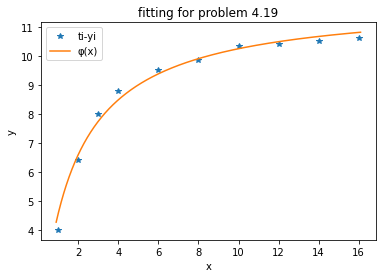

In [25]:
plt.plot(t,y, '*',label='ti-yi')  # 原函数散点
X=np.arange(t[0]-0.1,t[-1]+0.1,0.01)
Y=1/(α[0]+α[1]/X)
plt.plot(X, Y, '-',label='φ(x)')  # 拟合函数φ(x)
plt.xlabel('x')  # 给 x 轴添加坐标轴信息
plt.ylabel('y')  # 给 y 轴添加坐标轴信息
plt.legend()
plt.title('fitting for problem 4.19')  # 添加图片标题
plt.show()